Reproduce Fig. 5, comparing the C_ell reconstructed from power spectra and correlation functions and their signal to noise.

In [1]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid1771681/


/hildafs/home/andypark/.local/lib/python3.9/site-packages/distributed-2022.5.2-py3.9.egg/distributed/node.py:177: UserWarning: Port 8811 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36215 instead
  warnings.warn(


In [2]:
test=True #if true, run test case to make sure code runs.

In [3]:
nside=1024
if test:
    nside=64
    
use_window=True
unit_window=False

do_pseudo_cl=True
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=True
use_binned_theta=True

store_win=True

do_cov=True

In [4]:
#setup tomographic bins
shear_zbins=lsst_source_tomo_bins(nbins=2,use_window=use_window,nside=nside,f_sky=0.5,unit_win=unit_window)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002001 0.10082017 0.10162032 ... 2.9981997  2.9989998  2.9998    ] 100 5
source_tomo_bins, zmax 5.0 2.9998 0.59997
Tracer utils has no tracers
skylens will use following default values:  {'yaml_inp_file': None, 'python_inp_file': None, 'l_cl': None, 'Ang_PS': None, 'logger': None, 'tracer_utils': None, 'shear_zbins': None, 'kappa_zbins': None, 'zkernel_func_names': {'shear': 'set_kernel', 'galaxy': 'set_kernel', 'kappa': 'set_kernel'}, 'pk_params': {'non_linear': 1, 'kmax': 30, 'kmin': 0.0003, 'nk': 500, 'scenario': 'dmo', 'pk_func': 'camb_pk_too_many_z', 'halofit_version': 'takahashi'}, 'cosmo_params': {'h': 0.6774, 'Omb': 0.0486, 'Omd': 0.2589, 's8': 0.817, 'Om': 0.3075, 'Ase9': 2.2, 'mnu': 0.06, 'Omk': 0.0, 'tau': 0.06, 'ns': 0.965, 'OmR': 0.0014901684739047072, 'w': -1, 'wa': 0, 'Tcmb': <Quantity 2.7255 K>, 'z_max': 4, 'use_astropy': True, 'Oml': 0.6925, 'astropy_cosmo': FlatLambdaCDM(name="Planck15", H0=67.74 km / (Mpc s), Om0=0.3075, Tcmb0=2.7255 K, Neff=3.046, m_

/hildafs/home/andypark/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/angular_power_spectra.py:33: RuntimeWarning: divide by zero encountered in true_divide


power spectra function:  <bound method Power_Spectra.camb_pk_too_many_z of <skylens.power_spectra.Power_Spectra object at 0x14e186a980a0>>
Win gen: step size 9 192 31.0 10 False True
Window done. Size: 0.0


/hildafs/home/andypark/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/angular_power_spectra.py:123: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl_tomo, Win: None
cl graph done
gather_dict got empty dictionary


In [5]:
shear_zbins.keys()

dict_keys(['SN', 0, 1, 'n_bins', 'zmax', 'zp', 'zs', 'pz', 'z_bins', 'zp_sigma', 'zp_bias', 'bias_func'])

In [6]:
shear_zbins[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'bz1', 'AI', 'AI_z', 'mag_fact', 'shear_m_bias', 'lm', 'k_max', 'window_cl0', 'window', 'window_N'])

In [7]:
corrs=[corr_ll,corr_gg,corr_ggl]

In [8]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=(2,-2)

In [9]:
#setup parameters
lmax_cl=1024 #2000
lmin_cl=0
if test:
    lmax_cl=nside
l0=np.arange(lmin_cl,lmax_cl)

window_lmax=lmax_cl*2

lmin_cl_Bins=lmin_cl+2
lmax_cl_Bins=lmax_cl-10
Nl_bins=30
if test:
    Nl_bins=10
# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=1)#,binning_mode='decreasing')
# l_bins=l_bins[l_bins<=lmax_cl_Bins]
# l_bins0=l_bins*1.
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
dl=(l_bins[1:]-l_bins[:-1])
lb_cl=lb*1.
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [10]:
Skylens_kwargs=parse_dict(locals())

Skylens_kwargs['do_pseudo_cl']=True
Skylens_kwargs['do_xi']=False
SL_cl0=Skylens(**Skylens_kwargs)

# Skylens_kwargs_nW=copy.deepcopy(Skylens_kwargs)
# Skylens_kwargs_nW['use_window']=False
# SL_cl0_nW=Skylens(**Skylens_kwargs_nW)
# SL_cl0_nW.gather_data()

skylens will use following default values:  {'yaml_inp_file': None, 'python_inp_file': None, 'use_defaults': None, 'l_cl': None, 'Ang_PS': None, 'logger': None, 'kappa_zbins': None, 'zkernel_func_names': {'shear': 'set_kernel', 'galaxy': 'set_kernel', 'kappa': 'set_kernel'}, 'pk_params': {'non_linear': 1, 'kmax': 30, 'kmin': 0.0003, 'nk': 500, 'scenario': 'dmo', 'pk_func': 'camb_pk_too_many_z', 'halofit_version': 'takahashi'}, 'cosmo_params': {'h': 0.6774, 'Omb': 0.0486, 'Omd': 0.2589, 's8': 0.817, 'Om': 0.3075, 'Ase9': 2.2, 'mnu': 0.06, 'Omk': 0.0, 'tau': 0.06, 'ns': 0.965, 'OmR': 0.0014901684739047072, 'w': -1, 'wa': 0, 'Tcmb': <Quantity 2.7255 K>, 'z_max': 4, 'use_astropy': True, 'Oml': 0.6925, 'astropy_cosmo': FlatLambdaCDM(name="Planck15", H0=67.74 km / (Mpc s), Om0=0.3075, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)}, 'WT_kwargs': None, 'WT': None, 'z_PS': None, 'log_z_PS': 2, 'window_l': None, 'Win': None, 'cl_func_names': {('galaxy', 'galaxy'): 'calc_cl'},

/hildafs/home/andypark/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/angular_power_spectra.py:33: RuntimeWarning: divide by zero encountered in true_divide


power spectra function:  <bound method Power_Spectra.camb_pk_too_many_z of <skylens.power_spectra.Power_Spectra object at 0x14e03591a070>>
Win gen: step size 100 64 129.0 1 False True
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
power spectra function:  <bound method Power_Spectra.camb_pk_too_many_z of <skylens.power_spectra.Power_Spectra object at 0x14e034125700>>
Win gen: step size 100 9 129.0 1 False True
Window done. Size: 0.0


/hildafs/home/andypark/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/angular_power_spectra.py:123: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl_tomo, Win: None
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl_tomo, Win: None
cl graph done
gather_dict got empty dictionary
set binned measure done
Tracer utils has tracers:  ['shear', 'galaxy']
power spectra function:  <bound method Power_Spectra.camb_pk_too_many_z of <skylens.power_spectra.Power_Spectra object at 0x14dffdf1e820>>
Win gen: step size 100 64 129.0 1 True True
Win not found, computing now
scatter_dict got empty dictionary
cl_tomo, Win: None
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl_tomo, Win: None
cl graph done
gather_dict got empty dictionary
get_Win, total cl keys:  10
set window_cl: cl0,cl_b done 0.5396254062652588
set window_cl: cl done 0.579643726348877 0.010000001 0.0
set_window_cl done 1.2996811866760254
wigner_files: {0: '/hildafs/projects/phy200017p/andypark/Skylens_public/temp/wig3j_l5000_w5000_0_reorder.zarr', 2: '/hildafs/projects/phy200017p/a

In [11]:
%time clG=SL_cl0.cl_tomo()
%time cl0=client.compute(clG['cl_b']).result()
%time pcl0=client.compute(clG['stack']).result()

/hildafs/home/andypark/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/angular_power_spectra.py:123: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl_tomo, Win: {'cl': {('shear', 'shear'): {(0, 0): <Future: finished, type: dict, key: (0, 0)>, (0, 1): <Future: finished, type: dict, key: (0, 1)>, (1, 0): <Future: finished, type: dict, key: (1, 0)>, (1, 1): <Future: finished, type: dict, key: (1, 1)>}, ('galaxy', 'galaxy'): {(0, 0): <Future: finished, type: dict, key: (0, 0)>, (0, 1): <Future: finished, type: dict, key: (0, 1)>, (1, 0): <Future: finished, type: dict, key: (1, 0)>, (1, 1): <Future: finished, type: dict, key: (1, 1)>}, ('galaxy', 'shear'): {(0, 0): <Future: finished, type: dict, key: (0, 0)>, (1, 0): <Future: finished, type: dict, key: (1, 0)>, (0, 1): <Future: finished, type: dict, key: (0, 1)>, (1, 1): <Future: finished, type: dict, key: (1, 1)>}, ('shear', 'galaxy'): {(0, 0): <Future: finished, type: dict, key: (0, 0)>, (0, 1): <Future: finished, type: dict, key: (0, 1)>, (1, 0): <Future: finished, type: dict, key: (1, 0)>, (1, 1): <Future: finished, type: dict, key: (1, 1)>}}}
cl 

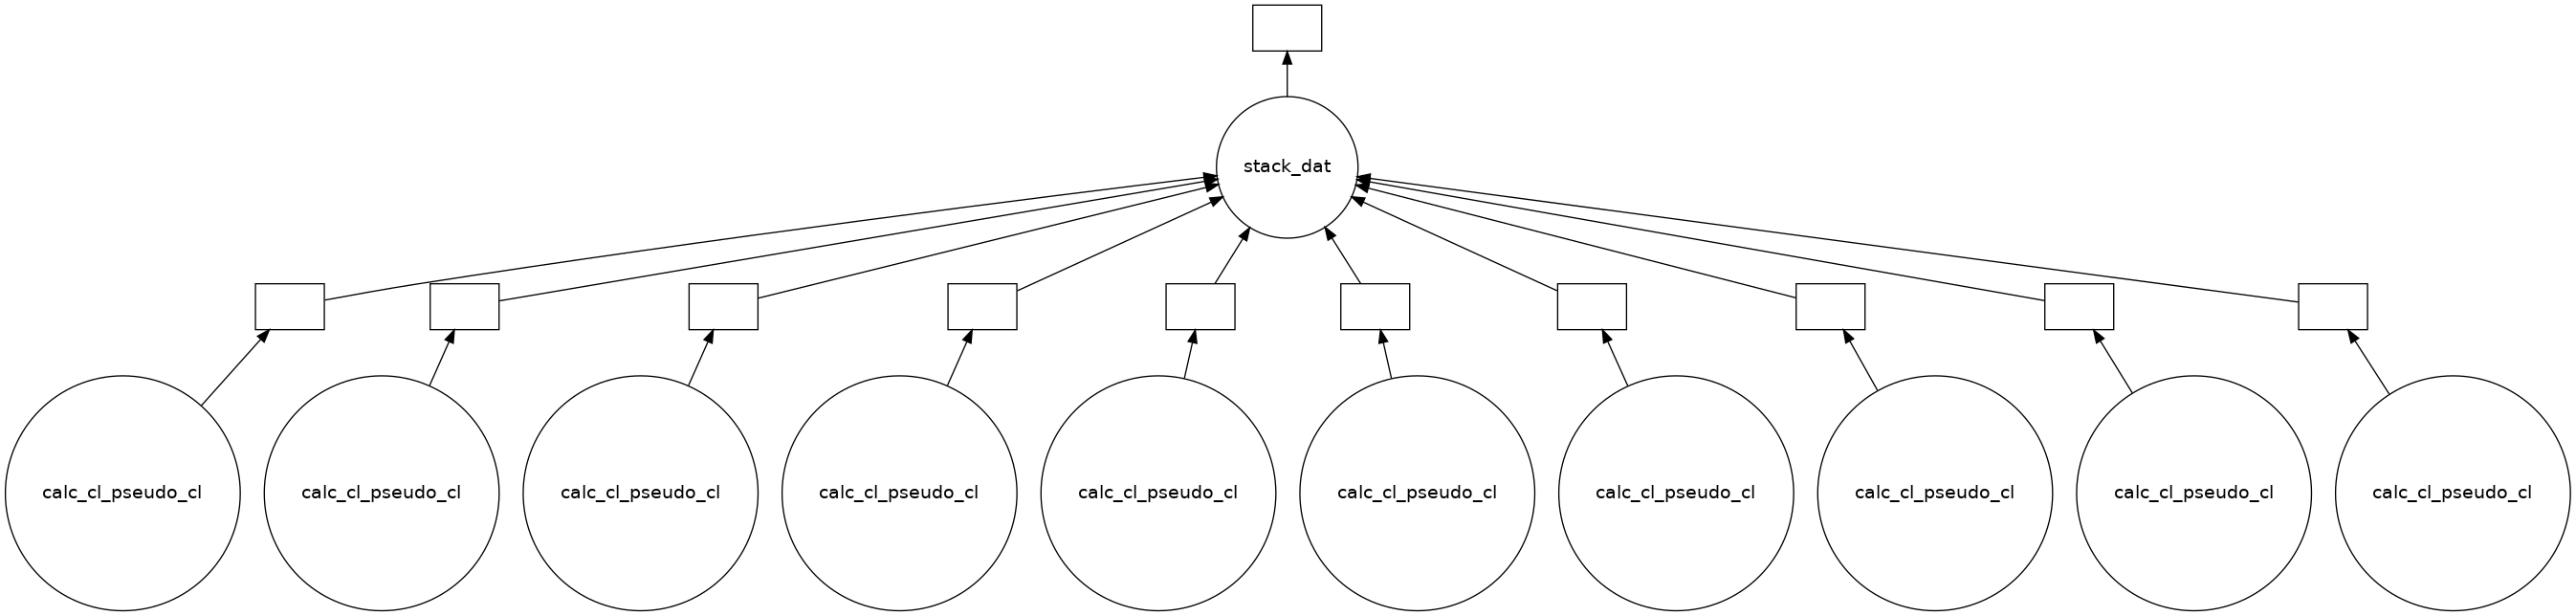

In [12]:
clG['stack'].visualize()

In [ ]:
SL_cl0.gather_data()

In [20]:
??SL_cl0.gather_data

Signature: SL_cl0.gather_data()
Docstring: <no docstring>
Source:   
    def gather_data(self):
        client=client_get(self.scheduler_info)
        keys=['xi_bin_utils','cl_bin_utils','Win','WT_binned','z_bins','SN']
        for k in keys:
            if hasattr(self,k):
                self.__dict__[k]=gather_dict(self.__dict__[k],scheduler_info=self.scheduler_info)
        self.Ang_PS.clz=client.gather(self.Ang_PS.clz)
        self.tracer_utils.gather_z_bins()
        if self.WT is not None:
            self.WT.gather_data()
File:      ~/.local/lib/python3.9/site-packages/skylens-0.1-py3.9.egg/skylens/skylens_main.py
Type:      method


In [ ]:
np.linalg.pinv(SL_cl0.Win['M']) @ pcl

In [21]:
SL_cl0.Win['cl'][corr_ll][bi].result()

{'corr': ('shear', 'shear'),
 'indxs': (0, 0),
 12: {'cl': array([3.1424465e+00, 7.8483546e-01, 6.2743464e-07, 4.9301825e-02,
         9.6011058e-07, 1.2233111e-02, 1.8142559e-06, 4.8618265e-03,
         1.0974499e-06, 2.3659214e-03, 9.4163755e-07, 1.3343843e-03,
         7.6818026e-07, 8.2216639e-04, 1.0595414e-06, 5.4820778e-04,
         1.1013115e-06, 3.8578612e-04, 7.8150890e-07, 2.7960719e-04,
         1.2627664e-06, 2.0190309e-04, 1.3248998e-06, 1.5147719e-04,
         8.2222368e-07, 1.2121850e-04, 1.0126053e-06, 9.5471078e-05,
         1.3150872e-06, 7.9153389e-05, 1.0692805e-06, 6.6220389e-05,
         8.7548221e-07, 5.3623975e-05, 1.0564877e-06, 4.5996909e-05,
         8.0257695e-07, 3.8435926e-05, 7.7665112e-07, 3.2323474e-05,
         9.0166350e-07, 2.8705885e-05, 8.4890456e-07, 2.7203077e-05,
         8.1278324e-07, 2.2976841e-05, 8.4032683e-07, 2.0515647e-05,
         7.3419079e-07, 1.6387257e-05, 8.6345426e-07, 1.5388077e-05,
         7.5327216e-07, 1.3514437e-05, 8.54258

In [32]:
clG.keys()

dict_keys(['stack', 'cl_b', 'cl', 'pseudo_cl', 'pseudo_cl_b', 'zkernel'])

In [24]:
%time pcl=client.compute(clG['pseudo_cl_b']).result()


CPU times: user 81.6 ms, sys: 33.9 ms, total: 115 ms
Wall time: 139 ms


In [26]:
pcl[corr_ll][bi]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [27]:
pcl0

{'pcl_b': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=float32)}

In [31]:
np.linalg.pinv(SL_cl0.Win['cl'][corr_ll][bi]['M']) @ pcl[corr_ll][bi]

dict_keys([(0, 0), (0, 1), (1, 0), (1, 1)])